In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats

In [2]:
demand = pd.read_csv(r'C:\Users\felip\Downloads\IESO_Data_Example\PUB_Demand_2018.csv')

In [3]:
demand = demand.rename(columns={
    demand.columns[0]:'Date',
    demand.columns[1]:'Hour',
    demand.columns[2]:'Market Demand',
    demand.columns[3]:'Ontario Demand'
})
demand = demand.drop(axis=0,index=[0,1,2])
demand.head()

,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084
5,2018-01-01,3,18453,15866
6,2018-01-01,4,18662,15725
7,2018-01-01,5,18060,15470


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


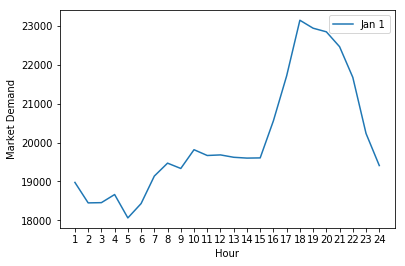

In [4]:
jan1 = demand[demand['Date']=='2018-01-01']
jan1[["Market Demand", "Ontario Demand"]] = jan1[["Market Demand", "Ontario Demand"]].copy().apply(pd.to_numeric)
plt.plot(jan1['Hour'],jan1['Market Demand'],label='Jan 1')
plt.xlabel('Hour')
plt.ylabel('Market Demand')
plt.legend(loc='best')

<ErrorbarContainer object of 3 artists>

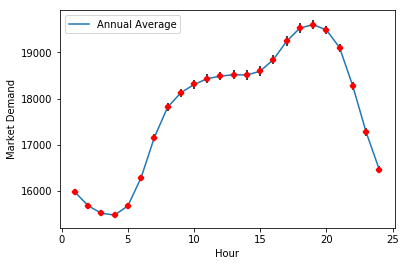

In [5]:
demand[["Market Demand", "Ontario Demand"]] = demand[["Market Demand", "Ontario Demand"]].copy().apply(pd.to_numeric)
annual_average = demand.groupby('Hour')[['Market Demand']].mean()

annual_average['Time'] = annual_average.index
annual_average[["Time"]] = annual_average[["Time"]].copy().apply(pd.to_numeric)
annual_average = annual_average.sort_values('Time')

annual_average['sem'] = demand.groupby('Hour')[['Market Demand']].sem()



plt.plot(annual_average['Time'],annual_average['Market Demand'],label='Annual Average')
plt.xlabel('Hour')
plt.ylabel('Market Demand')
plt.legend(loc='best')
plt.errorbar(annual_average['Time'],annual_average['Market Demand'], annual_average['sem'],
             marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4)


In [6]:
winter = demand[(demand['Date']<='2018-03-20')]
spring = demand[(demand['Date']>='2018-03-21') & (demand['Date']<='2018-06-20')]
summer = demand[(demand['Date']>='2018-06-21') & (demand['Date']<='2018-09-20')]
fall = demand[(demand['Date']>='2018-09-21')]

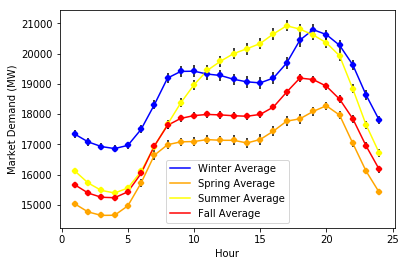

In [7]:
seasons = {('Winter','blue'):winter,
          ('Spring','orange'):spring,
          ('Summer','yellow'):summer,
          ('Fall','red'):fall}

for key, data in seasons.items():
    season_average = data.groupby('Hour')[['Market Demand']].mean()

    season_average['Time'] = season_average.index
    season_average[["Time"]] = season_average[["Time"]].copy().apply(pd.to_numeric)
    season_average = season_average.sort_values('Time')

    season_average['sem'] = data.groupby('Hour')[['Market Demand']].sem()

    plt.plot(season_average['Time'],season_average['Market Demand'],label=key[0]+' Average',color=key[1])
    plt.xlabel('Hour')
    plt.ylabel('Market Demand (MW)')
    plt.legend(loc='best')
    plt.errorbar(season_average['Time'],season_average['Market Demand'], season_average['sem'],
                 marker='x', ecolor='black',mec=key[1], linestyle='None',ms=4, mew=4, label=None)

In [8]:
price = pd.read_csv(r'C:\Users\felip\Downloads\IESO_Data_Example\PUB_PriceHOEPPredispOR_2018.csv')
price.columns = price.iloc[2]
price = price.drop(price.index[0:3])
price.head()

2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
5,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
6,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
7,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


In [9]:
price[['HOEP']] = price[['HOEP']].copy().apply(pd.to_numeric)
price[['Hour']] = price[['Hour']].copy().apply(pd.to_numeric)

In [10]:
winter = price[(price['Date']<='2018-03-20')]
spring = price[(price['Date']>='2018-03-21') & (price['Date']<='2018-06-20')]
summer = price[(price['Date']>='2018-06-21') & (price['Date']<='2018-09-20')]
fall = price[(price['Date']>='2018-09-21')]

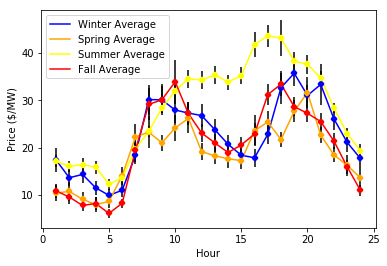

In [11]:
seasons = {('Winter','blue'):winter,
          ('Spring','orange'):spring,
          ('Summer','yellow'):summer,
          ('Fall','red'):fall}

for key, data in seasons.items():

    season_average = data.groupby('Hour')[['HOEP']].mean()

    season_average['Time'] = season_average.index
    season_average[["Time"]] = season_average[["Time"]].copy().apply(pd.to_numeric)
    season_average = season_average.sort_values('Time')

    season_average['sem'] = data.groupby('Hour')[['HOEP']].sem()

    plt.plot(season_average['Time'],season_average['HOEP'],label=key[0]+' Average',color=key[1])
    plt.xlabel('Hour')
    plt.ylabel('Price ($/MW)')
    plt.legend(loc='best')
    plt.errorbar(season_average['Time'],season_average['HOEP'], season_average['sem'],
                 marker='x', ecolor='black',mec=key[1], linestyle='None',ms=4, mew=4, label=None)

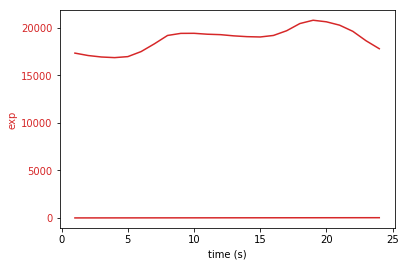

In [12]:
dataD = demand[(demand['Date']<='2018-03-20')].groupby('Hour')[['Market Demand']].mean()
dataD['Time'] = dataD.index
dataD[["Time"]] = dataD[["Time"]].copy().apply(pd.to_numeric)
dataD = dataD.sort_values('Time')


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(dataD['Time'], dataD, color=color)
ax1.tick_params(axis='y', labelcolor=color)

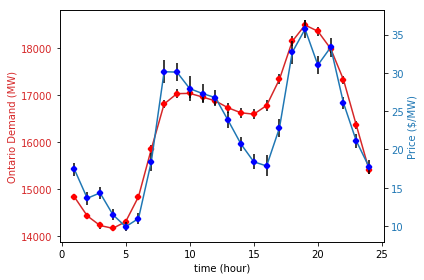

In [13]:
data1 = demand[(demand['Date']<='2018-03-20')].groupby('Hour')[['Ontario Demand']].mean()
data2 = price[(price['Date']<='2018-03-20')].groupby('Hour')[['HOEP']].mean()

data1['Time'] = data1.index
data1[["Time"]] = data1[["Time"]].copy().apply(pd.to_numeric)
data1 = data1.sort_values('Time')
data1['sem'] = demand.groupby('Hour')[['Ontario Demand']].sem()

data2['sem'] = price.groupby('Hour')[['HOEP']].sem()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (hour)')
ax1.set_ylabel('Ontario Demand (MW)', color=color)
ax1.plot(data1['Time'], data1['Ontario Demand'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.errorbar(data1['Time'],data1['Ontario Demand'], data1['sem'],
                 marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
ax2.plot(data1['Time'], data2['HOEP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.errorbar(data1['Time'],data2['HOEP'], data2['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

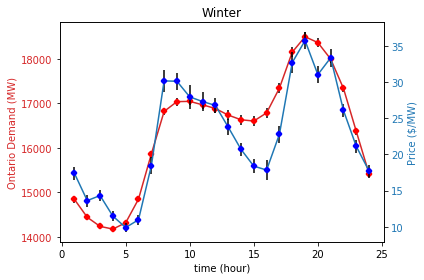

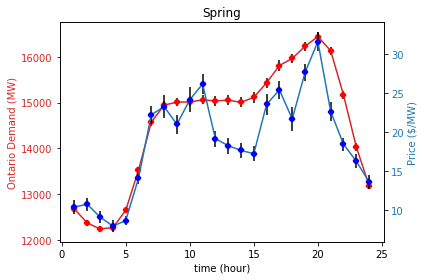

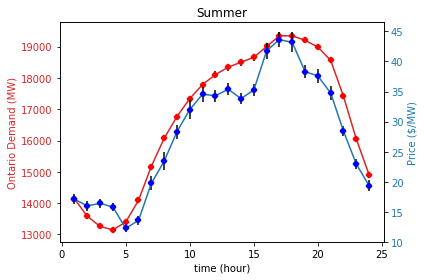

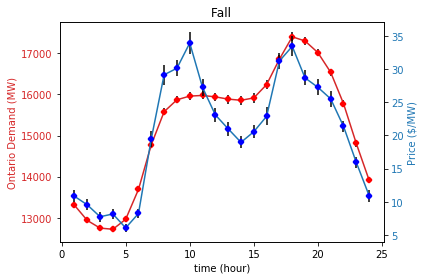

In [14]:
winter_price = price[(price['Date']<='2018-03-20')]
spring_price = price[(price['Date']>='2018-03-21') & (price['Date']<='2018-06-20')]
summer_price = price[(price['Date']>='2018-06-21') & (price['Date']<='2018-09-20')]
fall_price = price[(price['Date']>='2018-09-21')]

winter_demand = demand[(demand['Date']<='2018-03-20')]
spring_demand = demand[(demand['Date']>='2018-03-21') & (demand['Date']<='2018-06-20')]
summer_demand = demand[(demand['Date']>='2018-06-21') & (demand['Date']<='2018-09-20')]
fall_demand = demand[(demand['Date']>='2018-09-21')]

seasons_dict = {'Winter':[winter_price, winter_demand],
                'Spring':[spring_price, spring_demand],
                'Summer':[summer_price, summer_demand],
                'Fall':[fall_price, fall_demand]
               }

for season, data in seasons_dict.items():

    data1 = data[1].groupby('Hour')[['Ontario Demand']].mean()
    data2 = data[0].groupby('Hour')[['HOEP']].mean()

    data1['Time'] = data1.index
    data1[["Time"]] = data1[["Time"]].copy().apply(pd.to_numeric)
    data1 = data1.sort_values('Time')
    data1['sem'] = demand.groupby('Hour')[['Ontario Demand']].sem()

    data2['sem'] = price.groupby('Hour')[['HOEP']].sem()

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (hour)')
    ax1.set_ylabel('Ontario Demand (MW)', color=color)
    ax1.plot(data1['Time'], data1['Ontario Demand'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.errorbar(data1['Time'],data1['Ontario Demand'], data1['sem'],
                     marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
    ax2.plot(data1['Time'], data2['HOEP'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.errorbar(data1['Time'],data2['HOEP'], data2['sem'],
                     marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

    
    plt.title(season)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [15]:
price.head()

2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
4,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
5,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
6,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
7,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


In [16]:
demand.head()

,Date,Hour,Market Demand,Ontario Demand
3,2018-01-01,1,18974,16627
4,2018-01-01,2,18447,16084
5,2018-01-01,3,18453,15866
6,2018-01-01,4,18662,15725
7,2018-01-01,5,18060,15470


([<matplotlib.axis.XTick at 0x2432d181390>,
 <a list of 2 Text xticklabel objects>)

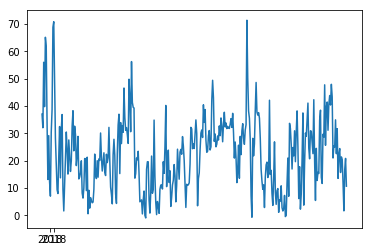

In [17]:
import matplotlib.dates as mdates
import datetime as dt

annual_price = price.groupby('Date')[['HOEP']].mean()
annual_price['Day'] = annual_price.index
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in annual_price['Day']]
plt.plot(x, annual_price['HOEP'])
plt.xticks(['Jan 15, 2018','Jan 10, 2018'])

In [18]:
low = annual_price[annual_price['HOEP']<10.0]

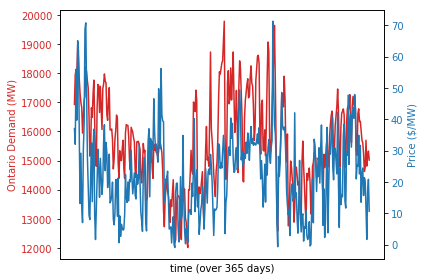

In [19]:
import matplotlib.dates as mdates
import datetime as dt

annual_price = price.groupby('Date')[['HOEP']].mean()
annual_price['Day'] = annual_price.index
time = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in annual_price['Day']]
annual_demand = demand.groupby('Date')[['Ontario Demand']].mean()
annual_demand['Day'] = annual_demand.index

data1 = annual_demand
data2 = annual_price


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (over 365 days)')
ax1.set_ylabel('Ontario Demand (MW)', color=color)
ax1.plot(time, data1['Ontario Demand'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, data2['HOEP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.xticks([])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [20]:
annual_price['Day'].values[0]

'2018-01-01'

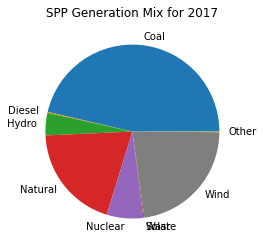

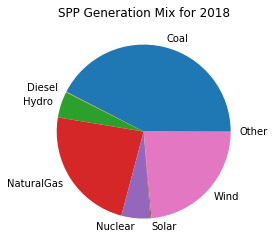

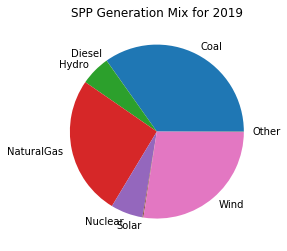

In [21]:
gen_mix = pd.read_csv(
    r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Generation Mix By Fuel Type\GenMix_2017.csv')

new = pd.DataFrame()

first = gen_mix.columns.values.tolist()[1].split(' ')[1]
new[first] = np.array([gen_mix[gen_mix.columns.values.tolist()[1]].sum()])
for element in gen_mix.columns.values.tolist()[2:]:
    if element.split(' ')[1] == first:
        new[first] = new[first] + np.array([gen_mix[element].sum()])
    else:
        new[element.split(' ')[1]] = np.array([gen_mix[element].sum()])
        first = element.split(' ')[1]

output = new.loc[0].values.tolist()[0:-1]
fuels = new.columns.values.tolist()[0:-1]

plt.pie(output,labels=fuels)
plt.title('SPP Generation Mix for 2017')
plt.show()

for year in range(2018,2020):
    gen_mix = pd.read_csv(
        r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Generation Mix By Fuel Type\GenMix_'+str(year)+'.csv')

    new = pd.DataFrame()

    first = gen_mix.columns.values.tolist()[1].split(' ')[1]
    new[first] = np.array([gen_mix[gen_mix.columns.values.tolist()[1]].sum()])
    for element in gen_mix.columns.values.tolist()[2:]:
        if element.split(' ')[1] == first:
            new[first] = new[first] + np.array([gen_mix[element].sum()])
        else:
            new[element.split(' ')[1]] = np.array([gen_mix[element].sum()])
            first = element.split(' ')[1]

    output = new.loc[0].values.tolist()[0:-1]
    output[3] += output[4]
    del output[4]
    fuels = new.columns.values.tolist()[0:-1]
    fuels[3] += fuels[4]
    del fuels[4]
    del output[6]
    del fuels[6]
    
    plt.pie(output,labels=fuels)
    plt.title('SPP Generation Mix for '+ str(year))
    plt.show()

In [22]:
########## DA RT SPP

In [62]:
# Reading RT dataset
RT = pd.read_csv(r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Regulation Prices\RT\2017\2017\2017AnnualRollup\RTBM_MCP_2017\RTBM_MCP_2017.csv')
RT.head()

,LOCAL_INTERVAL,GMTINTERVALEND,RESERVE_ZONE,REGUP_MCP,REGDN_MCP,SPIN_MCP,SUPP_MCP,REGUPMILE_MCP,REGDNMILE_MCP
0,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,1,4.8949,18.3436,2.9998,0.2498,12.22,20.99
1,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,2,4.8949,18.3436,2.9998,0.2498,12.22,20.99
2,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,3,4.8949,18.3436,2.9998,0.2498,12.22,20.99
3,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,4,4.8949,18.3436,2.9998,0.2498,12.22,20.99
4,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,5,4.8949,18.3436,2.9998,0.2498,12.22,20.99


In [64]:
# Reading DA dataset
DA = pd.read_csv(r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Regulation Prices\DA\2017\2017\2017AnnualRollup\DAMKT_MCP_2017\DAMKT_MCP_2017.csv')
DA.groupby('LOCAL_INTERVAL')['REGDN_MCP'].first()
DA.head()

,LOCAL_INTERVAL,GMTINTERVALEND,RESERVE_ZONE,REGUP_MCP,REGDN_MCP,SPIN_MCP,SUPP_MCP,REGUPMILE_MCP,REGDNMILE_MCP
0,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,1,4.5614,8.0188,3.1298,0.7098,6.22,20.99
1,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,2,4.5614,8.0188,3.1298,0.7098,6.22,20.99
2,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,3,4.5614,8.0188,3.1298,0.7098,6.22,20.99
3,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,4,4.5614,8.0188,3.1298,0.7098,6.22,20.99
4,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,5,4.5614,8.0188,3.1298,0.7098,6.22,20.99


In [25]:
year = RT.iloc[0]['LOCAL_INTERVAL'].split('-')[0]

In [26]:
# Adding month and day columns to facilitate handling of data
list_intervals = RT['LOCAL_INTERVAL'].values.tolist()
months = []
days = []
clock = []
calendar = []
for time in list_intervals:
    month = time.split('-')[1]
    day = time.split('-')[2].split(' ')[0]
    months.append(month)
    days.append(day)
    calendar.append(year+'/'+month+'/'+day)
    hour_min = time.split('-')[2].split(' ')[1].split('.')[0]
    clock.append(dt.datetime.strptime(hour_min,'%H:%M:%S').time())

RT['MONTH'] = np.array(months)
RT['DAY'] = np.array(days)
RT['CLOCK'] = np.array(clock)
RT['CALENDAR'] = np.array(calendar)

list_intervals = DA['LOCAL_INTERVAL'].values.tolist()
months = []
days = []
clock = []
calendar = []
for time in list_intervals:
    month = time.split('-')[1]
    day = time.split('-')[2].split(' ')[0]
    months.append(month)
    days.append(day)
    calendar.append(year+'/'+month+'/'+day)
    hour_min = time.split('-')[2].split(' ')[1].split('.')[0]
    clock.append(dt.datetime.strptime(hour_min,'%H:%M:%S').time())

DA['MONTH'] = np.array(months)
DA['DAY'] = np.array(days)
DA['CLOCK'] = np.array(clock)
DA['CALENDAR'] = np.array(calendar)

In [27]:
RT.head()

,LOCAL_INTERVAL,GMTINTERVALEND,RESERVE_ZONE,REGUP_MCP,REGDN_MCP,SPIN_MCP,SUPP_MCP,REGUPMILE_MCP,REGDNMILE_MCP,MONTH,DAY,CLOCK,CALENDAR
0,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,1,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
1,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,2,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
2,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,3,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
3,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,4,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
4,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,5,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01


In [32]:
# Creating a dataframe for a single day to compare DA and RT

RT_jan2 = RT[(RT['MONTH']=='01')&(RT['DAY']=='02')]
DA_jan2 = DA[(DA['MONTH']=='01')&(DA['DAY']=='02')]
DA_price = DA_jan2.groupby('LOCAL_INTERVAL')[['REGDN_MCP','CLOCK']].max()
RT_price = RT_jan2.groupby('LOCAL_INTERVAL')[['REGDN_MCP','CLOCK']].max()
comparison = DA_price.join(RT_price,how='right',lsuffix='_DA',rsuffix='_RT')
comparison.head()

,REGDN_MCP_DA,CLOCK_DA,REGDN_MCP_RT,CLOCK_RT
LOCAL_INTERVAL,,,,
2017-01-02 00:00:00.000000,21.2816,00:00:00,24.4206,00:00:00
2017-01-02 00:05:00.000000,NaN,NaN,23.0700,00:05:00
2017-01-02 00:10:00.000000,NaN,NaN,23.2857,00:10:00
2017-01-02 00:15:00.000000,NaN,NaN,28.5591,00:15:00
2017-01-02 00:20:00.000000,NaN,NaN,18.7803,00:20:00


In [29]:
def filler(df, DA, RT):
    price_list = df[DA].values.tolist()
    value = 0.0
    new_list = []
    for price in price_list:
        if math.isnan(price)==True:
            new_list.append(value)
        else:
            value = price
            new_list.append(price)
    new_df = pd.DataFrame()
    new_df[DA] = np.array(new_list)
    new_df[RT] = df[RT].values
    return new_df


def filtering(df, DA, RT):
    DA_list = df[DA].values.tolist()
    RT_list = df[RT].values.tolist()
    new_DA = []
    new_RT = []
    i = 0
    for price in DA_list:
        if math.isnan(price)==True:
            i += 1
            continue
        else:
            new_DA.append(price)
            new_RT.append(RT_list[i])
            i += 1
    new_df = pd.DataFrame()
    new_df[DA]=np.array(new_DA)
    new_df[RT]=np.array(new_RT)
    return new_df



0.7740112296983509

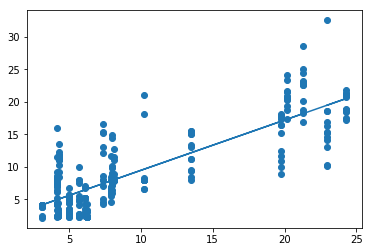

In [33]:
comparison2 = filler(comparison, 'REGDN_MCP_DA', 'REGDN_MCP_RT')
plt.scatter(comparison2['REGDN_MCP_DA'],comparison2['REGDN_MCP_RT'])

slope, intercept, r_value, p_value, std_err = stats.linregress(comparison2['REGDN_MCP_DA'],comparison2['REGDN_MCP_RT'])
plt.plot(comparison2['REGDN_MCP_DA'],slope*comparison2['REGDN_MCP_DA'] + intercept)
slope


0.9460534714891489

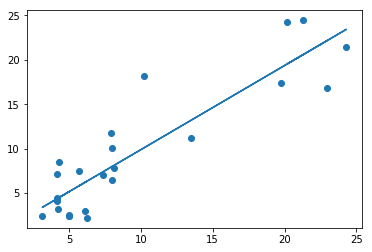

In [34]:
comparison3 = filtering(comparison, 'REGDN_MCP_DA', 'REGDN_MCP_RT')
plt.scatter(comparison3['REGDN_MCP_DA'],comparison3['REGDN_MCP_RT'])
m, b = np.polyfit(comparison3['REGDN_MCP_DA'], comparison3['REGDN_MCP_RT'], 1)

plt.plot(comparison3['REGDN_MCP_DA'], comparison3['REGDN_MCP_DA']*m + b)
m

In [35]:
dates_of_year = RT.groupby("CALENDAR").max().index.values.tolist()

mean +- sem = 1.411 +- 0.132


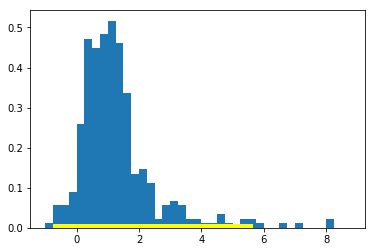

In [36]:
# Histogram with RT vs DA slopes for each day of the year
# for this data set I filled in the empty points for DA

slopes = np.empty(len(dates_of_year))
i = 0
for date in dates_of_year:
    RT_date = RT[RT['CALENDAR']==date]
    DA_date = DA[DA['CALENDAR']==date]
    RT_price = RT_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    DA_price = DA_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    comparison = DA_price.join(RT_price,how='right',lsuffix='_DA',rsuffix='_RT')
    comparison2 = filler(comparison, 'REGDN_MCP_DA', 'REGDN_MCP_RT')
    m, b = np.polyfit(comparison2['REGDN_MCP_DA'], comparison2['REGDN_MCP_RT'], 1)
    slopes[i] = m
    i += 1

_ = plt.hist(slopes,density=True,bins=np.arange(-1,9,0.25))
mean = slopes.mean()
sem = stats.sem(slopes)
left = np.percentile(slopes, 2.5)
right = np.percentile(slopes, 97.5)
plt.plot([left, right], [0,0], color='yellow', lw=8)
print("mean +- sem = {} +- {}".format(round(mean,3),round(sem,3)))

mean +- sem = 1.43 +- 0.067


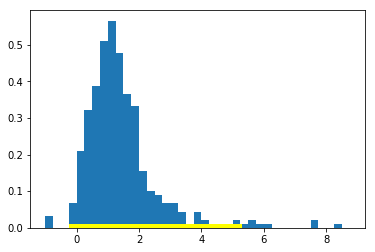

In [37]:
# Histogram with RT vs DA slopes for each day of the year
# for this data set I did not fill in the empty points for DA

slopes2 = np.empty(len(dates_of_year))
i = 0
for date in dates_of_year:
    RT_date = RT[RT['CALENDAR']==date]
    DA_date = DA[DA['CALENDAR']==date]
    RT_price = RT_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    DA_price = DA_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    comparison = DA_price.join(RT_price,how='right',lsuffix='_DA',rsuffix='_RT')
    comparison3 = filtering(comparison, 'REGDN_MCP_DA', 'REGDN_MCP_RT')
    m, b = np.polyfit(comparison3['REGDN_MCP_DA'], comparison3['REGDN_MCP_RT'], 1)
    slopes2[i] = m
    i += 1

_ = plt.hist(slopes2,density=True,bins=np.arange(-1,9,0.25))
mean = slopes2.mean()
sem = stats.sem(slopes2)
left = np.percentile(slopes2, 2.5)
right = np.percentile(slopes2, 97.5)
plt.plot([left, right], [0,0], color='yellow', lw=8)
print("mean +- sem = {} +- {}".format(round(mean,3),round(sem,3)))

In [38]:
interval = np.where((slopes>1.0)&(slopes<1.5),1,0)
interval.sum()/interval.size

0.23835616438356164

In [ ]:
###### Wind generation and RT price -- SPP

In [60]:
# Reading and handling Generation Mix by Fuel Type
gen_mix_2017 = pd.read_csv(
    r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Generation Mix By Fuel Type\GenMix_2017.csv')
GMT = gen_mix_2017.columns[0]
calendar = []
clock = []
for item in gen_mix_2017[GMT]:
    calendar.append(item.split('T')[0])
    clock.append(item.split('T')[1][0:-1])
gen_mix_2017['CALENDAR'] = np.array(calendar)
gen_mix_2017['CLOCK'] = np.array(clock)
gen_mix_2017.head()

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil,Hydro,Natural Gas,Nuclear,Solar,Waste Disposal Services,Wind,Waste Heat,Other,Average Actual Load,CALENDAR,CLOCK
0,2017-01-01T06:00:00Z,2956.2,13385.3,0.0,251.8,3025.9,2098.4,0.0,7.7,4499.1,0.0,35.4,25380.548,2017-01-01,06:00:00
1,2017-01-01T06:05:00Z,2920.2,13342.3,0.0,241.7,2988.6,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,06:05:00
2,2017-01-01T06:10:00Z,2920.2,13254.2,0.0,241.7,2969.2,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,06:10:00
3,2017-01-01T06:15:00Z,2923.2,13380.3,0.0,267.6,2981.2,2099.1,0.0,8.1,4551.8,0.0,35.7,25358.945,2017-01-01,06:15:00
4,2017-01-01T06:20:00Z,2900.3,13388.1,0.0,276.7,2960.1,2099.8,0.0,8.7,4603.1,0.0,36.4,25345.252,2017-01-01,06:20:00


In [40]:
RT.head()

,LOCAL_INTERVAL,GMTINTERVALEND,RESERVE_ZONE,REGUP_MCP,REGDN_MCP,SPIN_MCP,SUPP_MCP,REGUPMILE_MCP,REGDNMILE_MCP,MONTH,DAY,CLOCK,CALENDAR
0,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,1,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
1,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,2,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
2,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,3,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
3,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,4,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01
4,2017-01-01 00:05:00.000000,2017-01-01 06:05:00.000000,5,4.8949,18.3436,2.9998,0.2498,12.22,20.99,01,01,00:05:00,2017/01/01


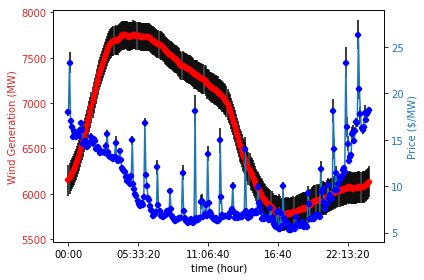

In [52]:
data1 = gen_mix_2017.groupby('CLOCK')[[' Wind']].mean()
data2 = RT.groupby('CLOCK')[['REGDN_MCP']].mean()

data1['sem'] = gen_mix_2017.groupby('CLOCK')[[' Wind']].sem()
data2['sem'] = RT.groupby('CLOCK')[['REGDN_MCP']].sem()

time = [dt.datetime.strptime(d,'%H:%M:%S').time() for d in data1.index]

#data2['Time'] = data1.index
#data1[["Time"]] = data1[["Time"]].copy().apply(pd.to_numeric)
#data1 = data1.sort_values('Time')

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (hour)')
ax1.set_ylabel('Wind Generation (MW)', color=color)
ax1.plot(time, data1[' Wind'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.errorbar(time,data1[' Wind'], data1['sem'],
                 marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, data2['REGDN_MCP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.errorbar(time,data2['REGDN_MCP'], data2['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [53]:
# analyze peaks

#data2.sort_values('REGDN_MCP',ascending=False)

In [61]:
pd.set_option('display.max_rows', data2.shape[0])
data2

,REGDN_MCP,sem
CLOCK,,
00:00:00,17.981472,0.368049
00:05:00,23.278345,1.134094
00:10:00,16.994656,0.378645
00:15:00,16.364164,0.372506
00:20:00,15.329448,0.353406
00:25:00,15.893704,0.365929
00:30:00,15.585551,0.341358
00:35:00,15.341102,0.343061
00:40:00,15.492763,0.344347


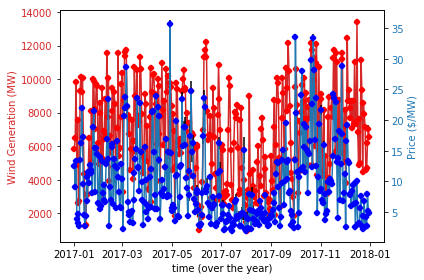

In [42]:
data1 = gen_mix_2017.groupby('CALENDAR')[[' Wind']].mean()
data2 = RT.groupby('CALENDAR')[['REGDN_MCP']].mean()


data1['sem'] = gen_mix_2017.groupby('CALENDAR')[[' Wind']].sem()
data2['sem'] = RT.groupby('CALENDAR')[['REGDN_MCP']].sem()

data1 = data1.iloc[:-1,:]
data2 = data2.iloc[:,:]


time = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data1.index]

#data2['Time'] = data1.index
#data1[["Time"]] = data1[["Time"]].copy().apply(pd.to_numeric)
#data1 = data1.sort_values('Time')

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (over the year)')
ax1.set_ylabel('Wind Generation (MW)', color=color)
ax1.plot(time, data1[' Wind'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.errorbar(time,data1[' Wind'], data1['sem'],
                 marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, data2['REGDN_MCP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.errorbar(time,data2['REGDN_MCP'], data2['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [43]:
dates_year = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in dates_of_year]
ordered_dates =sorted(dates_year)
ordered_dates = [dt.datetime.strftime(d,'%Y/%m/%d') for d in ordered_dates]
#ordered_dates

In [44]:
slopes_year = np.empty(len(ordered_dates))
i = 0
for date in ordered_dates:
    RT_date = RT[RT['CALENDAR']==date]
    DA_date = DA[DA['CALENDAR']==date]
    RT_price = RT_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    DA_price = DA_date.groupby('LOCAL_INTERVAL')[['REGDN_MCP']].first()
    comparison = DA_price.join(RT_price,how='right',lsuffix='_DA',rsuffix='_RT')
    comparison2 = filler(comparison, 'REGDN_MCP_DA', 'REGDN_MCP_RT')
    m, b = np.polyfit(comparison2['REGDN_MCP_DA'], comparison2['REGDN_MCP_RT'], 1)
    slopes_year[i] = m
    i += 1

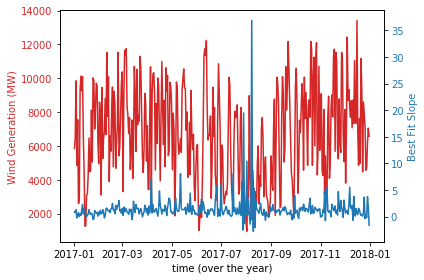

In [45]:
fig, ax1 = plt.subplots()

data1 = gen_mix_2017.groupby('CALENDAR')[[' Wind']].mean().iloc[:-1,:]
time = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data1.index]

color = 'tab:red'
ax1.set_xlabel('time (over the year)')
ax1.set_ylabel('Wind Generation (MW)', color=color)
ax1.plot(time, data1[' Wind'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.errorbar(time,data1[' Wind'], data1['sem'],
 #                marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Best Fit Slope', color=color)  # we already handled the x-label with ax1
ax2.plot(time, slopes_year, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.errorbar(time,data2['REGDN_MCP'], data2['sem'],
 #                marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [46]:
slope_wind = pd.DataFrame()
slope_wind['Date'] = np.array(time)
slope_wind['Wind Generation (MW)'] = data1[' Wind'].values
slope_wind['Best Fit Slope'] = slopes_year
slope_wind.head()

,Date,Wind Generation (MW),Best Fit Slope
0,2017-01-01,5851.720370,0.869462
1,2017-01-02,6489.304167,0.774011
2,2017-01-03,9846.985069,1.314507
3,2017-01-04,4856.841667,-0.259443
4,2017-01-05,7539.971875,0.327168


In [47]:
slope_wind['Wind Generation (MW)'].mean()

6726.270896479886

In [48]:
slope_wind[(slope_wind['Best Fit Slope']>2.0)]['Wind Generation (MW)'].mean()

5335.208759232993

In [49]:
slope_wind[(slope_wind['Best Fit Slope']>3.0)]['Wind Generation (MW)'].mean()

4639.9547465810965

In [50]:
slope_wind[(slope_wind['Best Fit Slope']>4.0)]['Wind Generation (MW)'].mean()

3931.100540123457

In [51]:
slope_wind[(slope_wind['Best Fit Slope']>0.75) & (slope_wind['Best Fit Slope']<1.25)]['Wind Generation (MW)'].mean()

7207.833411399143

In [1]:
print('test')

test
